'''
    BLAST TRADING SETUP - SWING TRADING

    1) Preconditions:
        a) Bullish Trend
        b) 44 moving average(SMA)
        c) Double bottom check for entry
        d) Stopless Required
        e) Target 1:2 / 1:3 (Risk:Reward)

    2) TimeFrame:
        a) 1W for trend identification
        b) 1D for entry

    3) Rules to follow:
        i) check whether the stock is in Bullish/Bearish Trend
        ii) Closing prices of candles should be above 44 moving average line
        iii) Identify Double Bottom before entering the trade
        iv) Set candles low as stoploss at double bottom
        v) Keep 1:2 ,1:3 as target
        vi) check Volume / Stochaistic indicator(to find oversold zones) - Optional

    4) NO TRADING:
        i) When any news breaks out (eg,. election results, quaterly results, interest rate etc)
        ii) When market is in consolidation (Sideways)
        
'''

In [1]:
import pandas as pd
import datetime as dt

def clean_input_data(csv_file_path):
    input_df = pd.read_csv(csv_file_path)
    input_df = input_df.drop(columns=['Timestamp'])
    return input_df[['Date','Open','High','Low','Close']]
    
csv_file_path = 'SBIN_1d_data_JAN2021-JULY2025.csv'
df = clean_input_data(csv_file_path)
print(df)

                           Date    Open    High     Low   Close
0     2021-01-01 05:30:00+05:30  274.90  280.00  274.40  279.40
1     2021-01-04 05:30:00+05:30  281.85  283.90  277.75  281.05
2     2021-01-05 05:30:00+05:30  278.05  282.45  277.00  281.75
3     2021-01-06 05:30:00+05:30  283.00  289.15  281.40  285.05
4     2021-01-07 05:30:00+05:30  289.00  291.80  287.00  287.70
...                         ...     ...     ...     ...     ...
1123  2025-07-14 05:30:00+05:30  809.80  815.50  808.00  808.85
1124  2025-07-15 05:30:00+05:30  811.00  821.00  810.50  816.45
1125  2025-07-16 05:30:00+05:30  816.00  834.20  815.30  831.70
1126  2025-07-17 05:30:00+05:30  838.40  842.50  826.35  829.00
1127  2025-07-18 05:30:00+05:30  832.00  832.65  820.25  823.35

[1128 rows x 5 columns]


In [2]:
# Calculating Simple moving average

df['SMA_44'] = df['Close'].rolling(window=44).mean().round(2)
df = df.dropna()
print(df)
ohlc_with_csv = df.to_csv("OHLC_with_SMA.csv")

                           Date    Open    High     Low   Close  SMA_44
43    2021-03-04 05:30:00+05:30  398.70  403.50  394.45  395.65  343.15
44    2021-03-05 05:30:00+05:30  395.00  395.00  378.10  383.65  345.52
45    2021-03-08 05:30:00+05:30  388.45  393.40  386.05  389.60  347.99
46    2021-03-09 05:30:00+05:30  393.45  394.90  382.25  387.60  350.40
47    2021-03-10 05:30:00+05:30  391.10  393.00  385.70  387.70  352.73
...                         ...     ...     ...     ...     ...     ...
1123  2025-07-14 05:30:00+05:30  809.80  815.50  808.00  808.85  802.55
1124  2025-07-15 05:30:00+05:30  811.00  821.00  810.50  816.45  802.91
1125  2025-07-16 05:30:00+05:30  816.00  834.20  815.30  831.70  803.45
1126  2025-07-17 05:30:00+05:30  838.40  842.50  826.35  829.00  804.29
1127  2025-07-18 05:30:00+05:30  832.00  832.65  820.25  823.35  804.94

[1085 rows x 6 columns]


In [3]:
def filter_data_by_sma_blocks(data, sma_column='SMA_44', block_size=10):
    """
    Filters the dataframe by checking if SMA is rising within each block of size `block_size`.
    Keeps only the blocks where SMA[end] > SMA[start].
    """
    data = data.copy().reset_index(drop=True)
    filtered_blocks = []

    for i in range(0, len(data) - block_size + 1, block_size):
        block = data.iloc[i:i + block_size]
        sma_start = block.iloc[0][sma_column]
        sma_end = block.iloc[-1][sma_column]

        # If SMA is rising in this block, retain the block
        if pd.notna(sma_start) and pd.notna(sma_end) and sma_end > sma_start:
            filtered_blocks.append(block)

    # Combine all the kept blocks
    filtered_data = pd.concat(filtered_blocks, ignore_index=True)
    return filtered_data


uptrend_filtered_data = filter_data_by_sma_blocks(df)
uptre_fil_dat = uptrend_filtered_data.to_csv("uptrend_filtered_data_ohlc.csv")
print(uptrend_filtered_data)


                          Date    Open    High     Low   Close  SMA_44
0    2021-03-04 05:30:00+05:30  398.70  403.50  394.45  395.65  343.15
1    2021-03-05 05:30:00+05:30  395.00  395.00  378.10  383.65  345.52
2    2021-03-08 05:30:00+05:30  388.45  393.40  386.05  389.60  347.99
3    2021-03-09 05:30:00+05:30  393.45  394.90  382.25  387.60  350.40
4    2021-03-10 05:30:00+05:30  391.10  393.00  385.70  387.70  352.73
..                         ...     ...     ...     ...     ...     ...
695  2025-07-07 05:30:00+05:30  811.20  812.65  805.15  806.85  799.79
696  2025-07-08 05:30:00+05:30  807.90  813.55  805.35  812.65  800.62
697  2025-07-09 05:30:00+05:30  810.00  812.45  809.00  810.95  801.58
698  2025-07-10 05:30:00+05:30  811.30  815.50  806.90  808.00  802.23
699  2025-07-11 05:30:00+05:30  807.55  812.55  804.55  808.65  802.39

[700 rows x 6 columns]


In [4]:
def detect_double_bottom(data, window=20, depth=5):
    signals = []
    seen_dates = set()  # To track unique signal dates

    # Ensure index is datetime for proper date referencing
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)

    # Reset index for position-based referencing if needed
    data = data.reset_index()

    for i in range(window, len(data) - window):
        # First bottom
        first_bottom_idx = data['Low'][i - window:i].idxmin()
        first_bottom = data.loc[first_bottom_idx]

        # Second bottom
        second_bottom_idx = data['Low'][i:i + window].idxmin()
        second_bottom = data.loc[second_bottom_idx]

        # Neckline between two bottoms
        neckline = max(data.loc[first_bottom_idx:second_bottom_idx]['High'])

        # Check if both bottoms are near in price (within 2%)
        price_diff_pct = abs(first_bottom['Low'] - second_bottom['Low']) / first_bottom['Low'] * 100

        if price_diff_pct <= 2:
            try:
                buy_row = data.loc[second_bottom_idx + depth]
                signal_date = data.loc[second_bottom_idx + depth, 'Date']

                # Only add if this signal date hasn't been seen before
                if signal_date not in seen_dates:
                    seen_dates.add(signal_date)

                    signals.append({
                        'Signal_Date': signal_date,
                        'Buy_Price': buy_row['Close'],
                        'StopLoss': second_bottom['Low'],
                        'First_Bottom_Date': data.loc[first_bottom_idx, 'Date'],
                        'Second_Bottom_Date': data.loc[second_bottom_idx, 'Date'],
                        'Neckline': neckline
                    })

            except Exception as e:
                continue  # Skip if index out of range

    return pd.DataFrame(signals)

signals = detect_double_bottom(uptrend_filtered_data)
print(signals)
signal_csv = signals.to_csv('signals_blast_strategy.csv')


                  Signal_Date  Buy_Price  StopLoss          First_Bottom_Date  \
0   2021-06-28 05:30:00+05:30     426.75    400.50  2021-06-18 05:30:00+05:30   
1   2021-09-07 05:30:00+05:30     429.10    418.70  2021-06-23 05:30:00+05:30   
2   2021-09-15 05:30:00+05:30     443.85    425.10  2021-08-31 05:30:00+05:30   
3   2021-12-06 05:30:00+05:30     465.30    454.30  2021-10-04 05:30:00+05:30   
4   2021-12-07 05:30:00+05:30     476.70    458.00  2021-11-29 05:30:00+05:30   
5   2022-03-04 05:30:00+05:30     461.95    468.00  2021-12-06 05:30:00+05:30   
6   2022-07-05 05:30:00+05:30     472.15    467.00  2021-12-07 05:30:00+05:30   
7   2022-07-11 05:30:00+05:30     488.20    425.00  2022-03-07 05:30:00+05:30   
8   2022-08-30 05:30:00+05:30     531.25    508.25  2022-07-20 05:30:00+05:30   
9   2022-09-06 05:30:00+05:30     537.80    508.75  2022-08-23 05:30:00+05:30   
10  2022-09-07 05:30:00+05:30     532.85    517.95  2022-08-23 05:30:00+05:30   
11  2022-10-21 05:30:00+05:3

SIGNALS BACKTEST ANALYSIS
Backtesting 38 signals with 1:2 risk-reward ratio...

BACKTEST RESULTS (Risk:Reward = 1:2)
Total Trades                  : 38
Winning Trades                : 27
Losing Trades                 : 11
Win Rate (%)                  : 71.05
Total Return (%)              : 33.45
Total PnL                     : 33451.1
Average Trade                 : 880.29
Average Return per Trade (%)  : 2.19
Best Trade                    : 3990.0
Worst Trade                   : -1997.5
Maximum Drawdown (%)          : -4.51
Average Drawdown (%)          : -2.08
Profit Factor                 : 3.26
Average Winning Trade         : 1786.3
Average Losing Trade          : -1343.55
Average Days in Trade         : 10.9
Target Hits                   : 4
Stop Loss Hits                : 6
Final Portfolio Value         : 133451.1

Generating performance charts...


C:\Users\Rajeshree\AppData\Local\Temp\ipykernel_15576\2526966868.py:291: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trades_df['Entry_Month'] = pd.to_datetime(trades_df['Entry_Date']).dt.to_period('M')


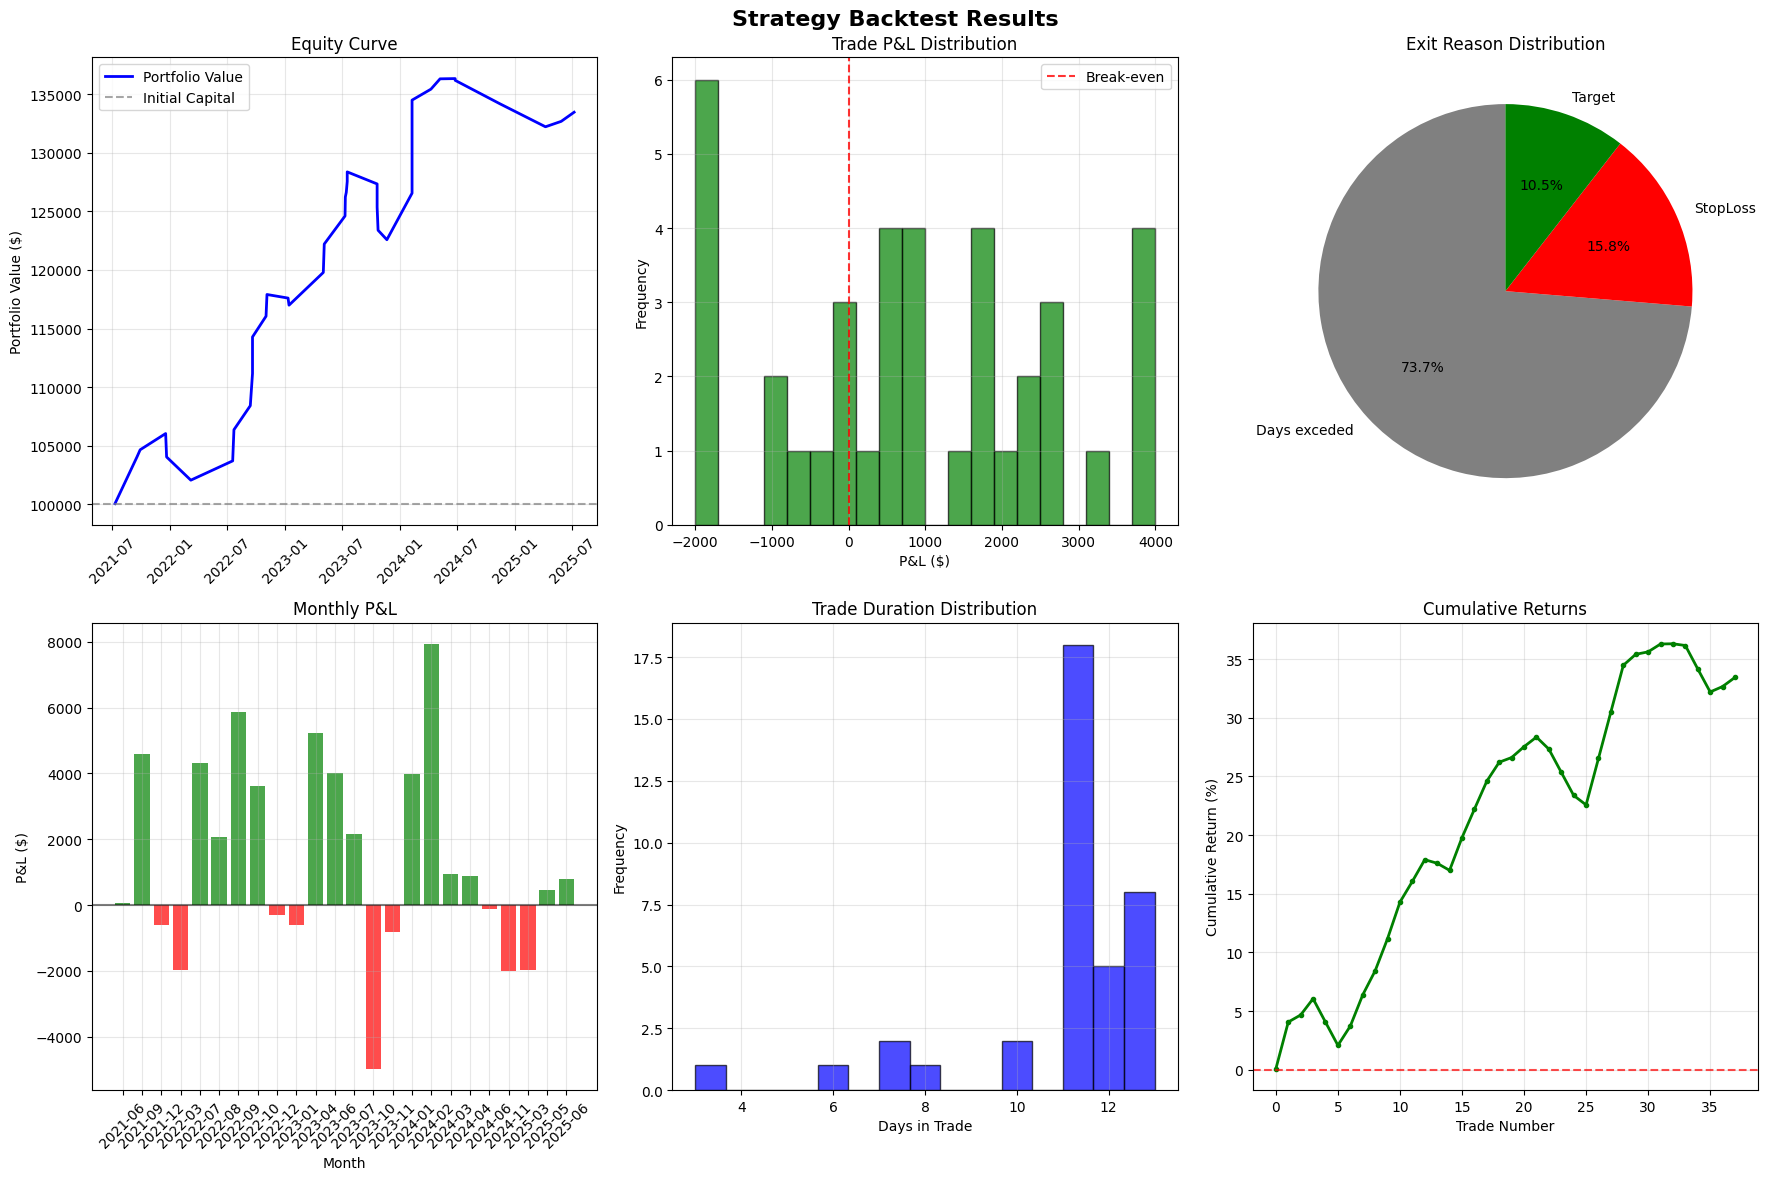


SIGNALS BACKTEST ANALYSIS
Backtesting 38 signals with 1:3 risk-reward ratio...

BACKTEST RESULTS (Risk:Reward = 1:3)
Total Trades                  : 38
Winning Trades                : 27
Losing Trades                 : 11
Win Rate (%)                  : 71.05
Total Return (%)              : 34.27
Total PnL                     : 34271.5
Average Trade                 : 901.88
Average Return per Trade (%)  : 2.25
Best Trade                    : 5301.0
Worst Trade                   : -1997.5
Maximum Drawdown (%)          : -4.57
Average Drawdown (%)          : -2.03
Profit Factor                 : 3.32
Average Winning Trade         : 1816.69
Average Losing Trade          : -1343.55
Average Days in Trade         : 11.3
Target Hits                   : 0
Stop Loss Hits                : 6
Final Portfolio Value         : 134271.5

Generating performance charts...


C:\Users\Rajeshree\AppData\Local\Temp\ipykernel_15576\2526966868.py:291: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trades_df['Entry_Month'] = pd.to_datetime(trades_df['Entry_Date']).dt.to_period('M')


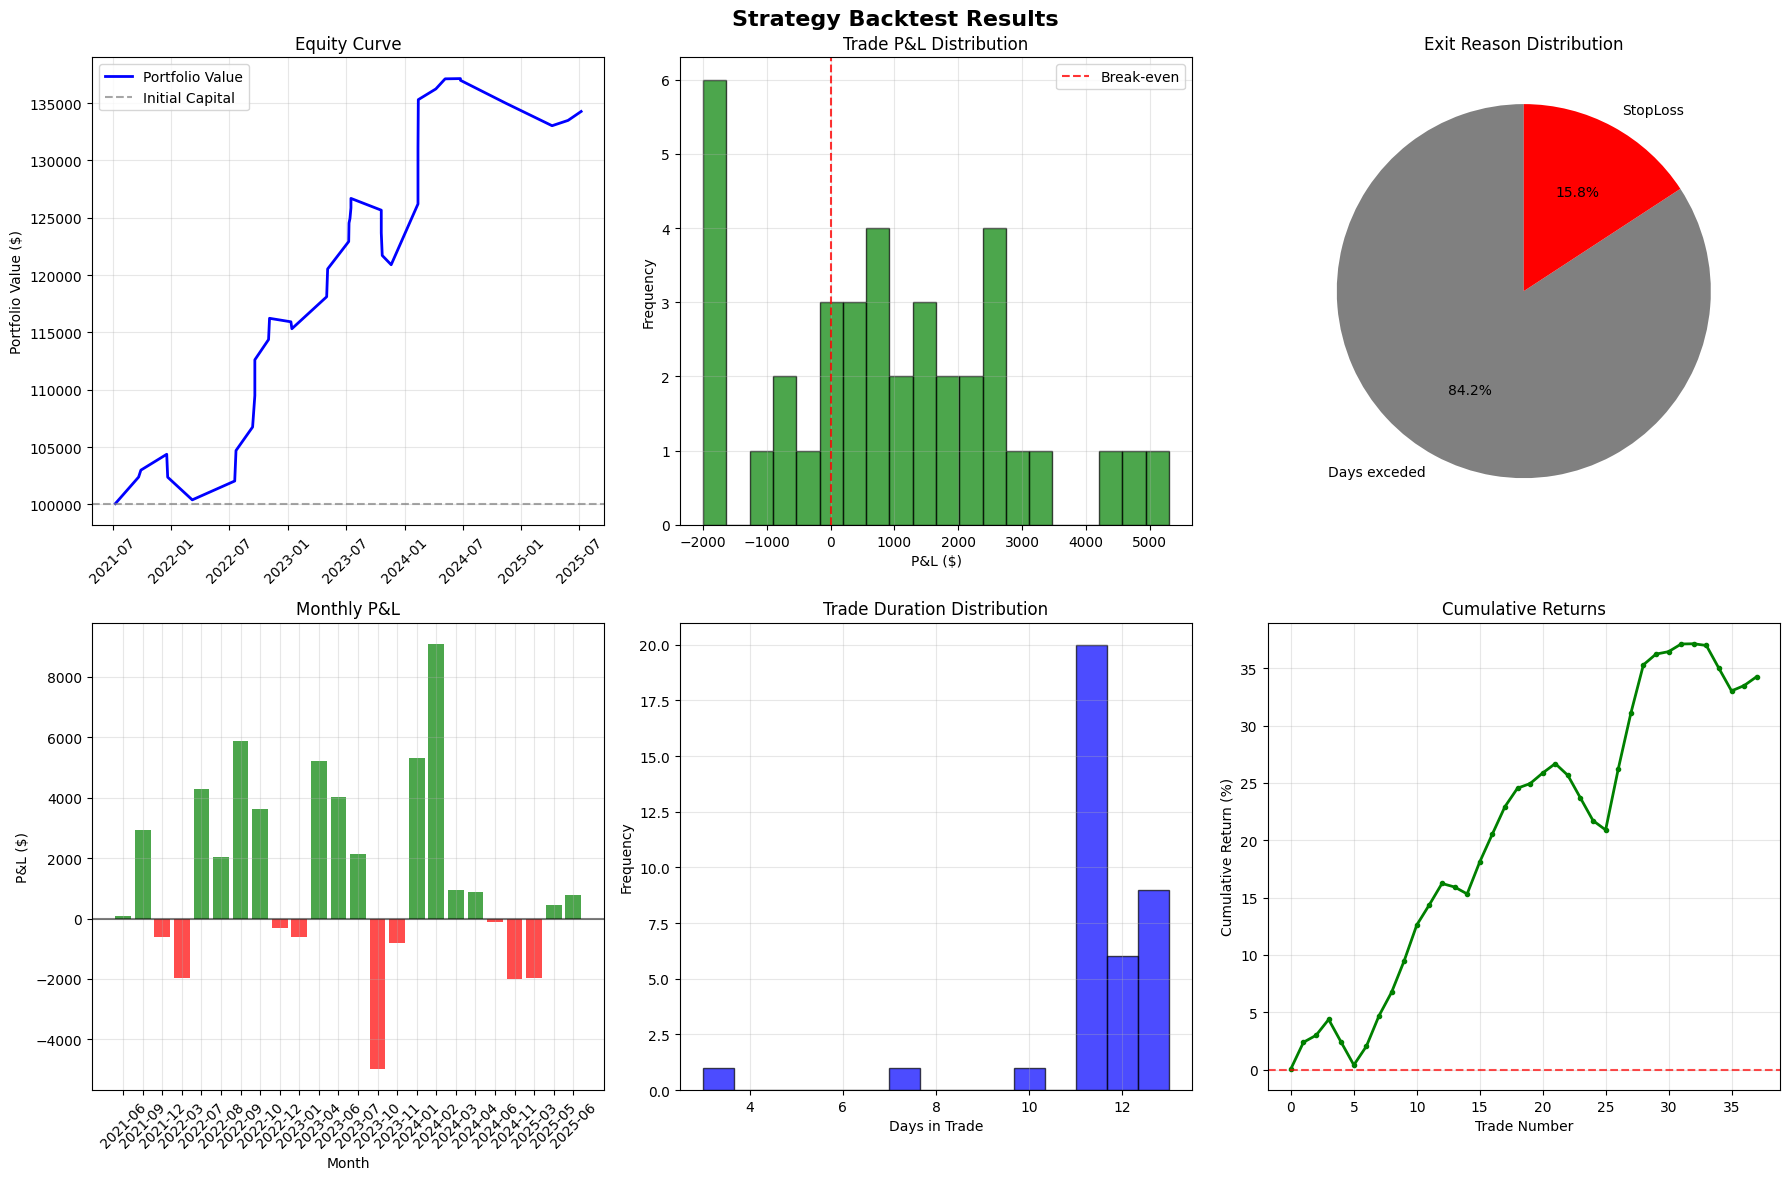


COMPARISON SUMMARY
1:2 R:R -> Trades: 38, Win Rate: 71.05%, Total Return: 33.45%
1:3 R:R -> Trades: 38, Win Rate: 71.05%, Total Return: 34.27%


In [5]:
import matplotlib.pyplot as plt

class SignalsBacktester:
    def __init__(self, signals_csv_path, price_data_csv_path):
        """
        Initialize backtester with signals CSV and price data CSV
        
        signals_csv should contain: Signal_Date, Buy_Price, StopLoss
        price_data_csv should contain: Date, Open, High, Low, Close
        """
        # Load signals
        self.signals = pd.read_csv(signals_csv_path)
        self.signals['Signal_Date'] = pd.to_datetime(self.signals['Signal_Date'])
        
        # Load price data
        self.price_data = pd.read_csv(price_data_csv_path)
        self.price_data['Date'] = pd.to_datetime(self.price_data['Date'])
        self.price_data = self.price_data.sort_values('Date').reset_index(drop=True)
        
        self.trades = []
        self.equity_curve = []
        self.initial_capital = 100000
        
    def backtest_strategy(self, initial_capital=100000, risk_reward_ratio=2):
        """
        Backtest using pre-generated signals
        """
        self.initial_capital = initial_capital
        self.trades = []
        
        if len(self.signals) == 0:
            print("No signals found in CSV file.")
            return pd.DataFrame()
        
        print(f"Backtesting {len(self.signals)} signals with 1:{risk_reward_ratio} risk-reward ratio...")
        
        for _, signal in self.signals.iterrows():
            trade = self._execute_trade(signal, risk_reward_ratio)
            if trade:
                self.trades.append(trade)
                #print(self.trades)
        
        trade_data = pd.DataFrame(self.trades).to_csv("backtest_trade_data.csv")

        
        #trade_data = self.trades.to_csv("backtest_trade_data.csv")
        
        self._calculate_equity_curve()
        return pd.DataFrame(self.trades)
    
    def _execute_trade(self, signal, risk_reward_ratio):
        """Execute individual trade based on signal"""
        entry_date = signal['Signal_Date']
        entry_price = signal['Buy_Price']
        stop_loss = signal['StopLoss']
        
        # Find entry date index in price data
        entry_idx = None
        for i, row in self.price_data.iterrows():
            if row['Date'].date() >= entry_date.date():
                entry_idx = i
                break
        
        if entry_idx is None or entry_idx >= len(self.price_data) - 1:
            return None  # Signal date not found or at end of data
        
        # Calculate risk and target
        risk_ps = int(entry_price/10)
        risk_per_trade = (int(risk_ps)/2)
        stop_loss = entry_price - risk_per_trade
        target_price = entry_price + (risk_per_trade * risk_reward_ratio)

        if risk_per_trade <= 0:
              return None  # Invalid trade setup
        # Setting SL and target using entry_price/2
        # nearest_hundred = round(entry_price / 100) * 100
        # stop_loss =  (abs(nearest_hundred - entry_price)/2) + nearest_hundred
        # risk_per_share = entry_price - stop_loss
        # if risk_per_share <= 0:
        #     return None  # Invalid trade setup
        
        # target_price = entry_price + (risk_per_share * risk_reward_ratio)
        
        # Position sizing (risk 2% of capital per trade)
        risk_amount = self.initial_capital * 0.02
        #shares = int(risk_amount / risk_per_share)
        shares = int(risk_amount / risk_per_trade)
        
        if shares <= 0:
            return None
        
        # Track trade from entry date until exit
        for i in range(entry_idx + 1, len(self.price_data)):
            current_row = self.price_data.iloc[i]
            current_date = current_row['Date']
            high_price = current_row['High']
            low_price = current_row['Low']
            close_price = current_row['Close']

            days_in_trd = (current_date - entry_date).days
            
            # Check for target hit first (using high of the day)
            if high_price >= target_price:
                exit_price = target_price
                exit_reason = 'Target'
                exit_date = current_date
                break
            
            # Check for stop loss hit (using low of the day)
            elif low_price <= stop_loss:
                exit_price = stop_loss
                exit_reason = 'StopLoss'
                exit_date = current_date
                break

            elif days_in_trd > 10:
                exit_price = high_price
                exit_reason = 'Days exceded'
                exit_date = current_date
                break
        else:
            # Trade not closed by end of data
            exit_price = self.price_data.iloc[-1]['Close']
            exit_reason = 'End of Data'
            exit_date = self.price_data.iloc[-1]['Date']

        
        # Calculate trade metrics
        pnl = (exit_price - entry_price) * shares
        pnl_pct = ((exit_price - entry_price) / entry_price) * 100
        
        # Calculate days in trade
        days_in_trade = (exit_date - entry_date).days


        
        trade = {
            'Entry_Date': entry_date,
            'Exit_Date': exit_date,
            'Days_in_Trade': days_in_trade,
            'Entry_Price': entry_price,
            'Exit_Price': exit_price,
            'Target_Price': target_price,
            'Stop_Loss': stop_loss,
            'Shares': shares,
            'PnL': pnl,
            'PnL_Pct': pnl_pct,
            'Exit_Reason': exit_reason,
            'Risk_Amount': risk_amount
        }
        
        return trade


    
    def _calculate_equity_curve(self):
        """Calculate equity curve for drawdown analysis"""
        if not self.trades:
            return
        
        trades_df = pd.DataFrame(self.trades)
        trades_df = trades_df.sort_values('Entry_Date').reset_index(drop=True)
        
        equity = self.initial_capital
        self.equity_curve = [(None, equity)]  # (date, equity)
        
        for _, trade in trades_df.iterrows():
            equity += trade['PnL']
            self.equity_curve.append((trade['Exit_Date'], equity))
    
    def calculate_performance_metrics(self):
        """Calculate comprehensive performance metrics"""
        if not self.trades:
            return {"Error": "No trades executed"}
        
        trades_df = pd.DataFrame(self.trades)
        
        # Basic trade statistics
        total_trades = len(trades_df)
        winning_trades = len(trades_df[trades_df['PnL'] > 0])
        losing_trades = len(trades_df[trades_df['PnL'] < 0])
        
        # Win rate
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        
        # PnL metrics
        total_pnl = trades_df['PnL'].sum()
        avg_trade = trades_df['PnL'].mean()
        best_trade = trades_df['PnL'].max()
        worst_trade = trades_df['PnL'].min()
        
        # Return metrics
        total_return = (total_pnl / self.initial_capital) * 100
        avg_return_per_trade = trades_df['PnL_Pct'].mean()
        
        # Drawdown calculations
        if len(self.equity_curve) > 1:
            equity_values = [eq[1] for eq in self.equity_curve[1:]]  # Skip initial value
            equity_series = pd.Series(equity_values)
            running_max = equity_series.expanding().max()
            drawdown = (equity_series - running_max) / running_max * 100
            max_drawdown = drawdown.min()
            avg_drawdown = drawdown[drawdown < 0].mean() if any(drawdown < 0) else 0
        else:
            max_drawdown = 0
            avg_drawdown = 0
        
        # Profit factor
        gross_profit = trades_df[trades_df['PnL'] > 0]['PnL'].sum() if winning_trades > 0 else 0
        gross_loss = abs(trades_df[trades_df['PnL'] < 0]['PnL'].sum()) if losing_trades > 0 else 0
        profit_factor = gross_profit / gross_loss if gross_loss > 0 else float('inf')
        
        # Average trade metrics
        avg_win = trades_df[trades_df['PnL'] > 0]['PnL'].mean() if winning_trades > 0 else 0
        avg_loss = trades_df[trades_df['PnL'] < 0]['PnL'].mean() if losing_trades > 0 else 0
        avg_days_in_trade = trades_df['Days_in_Trade'].mean()
        
        # Exit reason breakdown
        exit_reasons = trades_df['Exit_Reason'].value_counts()
        target_hits = exit_reasons.get('Target', 0)
        stop_hits = exit_reasons.get('StopLoss', 0)
        
        metrics = {
            'Total Trades': total_trades,
            'Winning Trades': winning_trades,
            'Losing Trades': losing_trades,
            'Win Rate (%)': round(win_rate, 2),
            'Total Return (%)': round(total_return, 2),
            'Total PnL': round(total_pnl, 2),
            'Average Trade': round(avg_trade, 2),
            'Average Return per Trade (%)': round(avg_return_per_trade, 2),
            'Best Trade': round(best_trade, 2),
            'Worst Trade': round(worst_trade, 2),
            'Maximum Drawdown (%)': round(max_drawdown, 2),
            'Average Drawdown (%)': round(avg_drawdown, 2),
            'Profit Factor': round(profit_factor, 2),
            'Average Winning Trade': round(avg_win, 2),
            'Average Losing Trade': round(avg_loss, 2),
            'Average Days in Trade': round(avg_days_in_trade, 1),
            'Target Hits': target_hits,
            'Stop Loss Hits': stop_hits,
            'Final Portfolio Value': round(self.initial_capital + total_pnl, 2)
        }
        
        return metrics
    
    def plot_results(self):
        """Generate comprehensive performance plots"""
        if not self.trades:
            print("No trades to plot")
            return
        
        trades_df = pd.DataFrame(self.trades)
        
        # Create subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Strategy Backtest Results', fontsize=16, fontweight='bold')
        
        # 1. Equity Curve
        if len(self.equity_curve) > 1:
            dates = [eq[0] for eq in self.equity_curve[1:]]  # Skip initial None date
            equity_values = [eq[1] for eq in self.equity_curve[1:]]
            
            axes[0,0].plot(dates, equity_values, 'b-', linewidth=2, label='Portfolio Value')
            axes[0,0].axhline(y=self.initial_capital, color='gray', linestyle='--', alpha=0.7, label='Initial Capital')
            axes[0,0].set_title('Equity Curve')
            axes[0,0].set_ylabel('Portfolio Value ($)')
            axes[0,0].grid(True, alpha=0.3)
            axes[0,0].legend()
            axes[0,0].tick_params(axis='x', rotation=45)
        
        # 2. Trade PnL Distribution
        axes[0,1].hist(trades_df['PnL'], bins=min(20, len(trades_df)), alpha=0.7, color='green', edgecolor='black')
        axes[0,1].axvline(x=0, color='red', linestyle='--', alpha=0.8, label='Break-even')
        axes[0,1].set_title('Trade P&L Distribution')
        axes[0,1].set_xlabel('P&L ($)')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].grid(True, alpha=0.3)
        axes[0,1].legend()
        
        # 3. Win/Loss Distribution
        exit_reasons = trades_df['Exit_Reason'].value_counts()
        colors = {'Target': 'green', 'StopLoss': 'red', 'End of Data': 'orange'}
        pie_colors = [colors.get(reason, 'gray') for reason in exit_reasons.index]
        
        axes[0,2].pie(exit_reasons.values, labels=exit_reasons.index, colors=pie_colors, 
                      autopct='%1.1f%%', startangle=90)
        axes[0,2].set_title('Exit Reason Distribution')
        
        # 4. Monthly P&L
        trades_df['Entry_Month'] = pd.to_datetime(trades_df['Entry_Date']).dt.to_period('M')
        monthly_pnl = trades_df.groupby('Entry_Month')['PnL'].sum()
        
        if len(monthly_pnl) > 1:
            monthly_colors = ['green' if x >= 0 else 'red' for x in monthly_pnl.values]
            bars = axes[1,0].bar(range(len(monthly_pnl)), monthly_pnl.values, 
                                color=monthly_colors, alpha=0.7)
            axes[1,0].set_title('Monthly P&L')
            axes[1,0].set_xlabel('Month')
            axes[1,0].set_ylabel('P&L ($)')
            axes[1,0].grid(True, alpha=0.3)
            axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
            
            # Rotate x-axis labels
            month_labels = [str(month) for month in monthly_pnl.index]
            axes[1,0].set_xticks(range(len(monthly_pnl)))
            axes[1,0].set_xticklabels(month_labels, rotation=45)
        else:
            axes[1,0].text(0.5, 0.5, 'Insufficient data\nfor monthly analysis', 
                          ha='center', va='center', transform=axes[1,0].transAxes, fontsize=12)
            axes[1,0].set_title('Monthly P&L')
        
        # 5. Trade Duration Distribution
        axes[1,1].hist(trades_df['Days_in_Trade'], bins=min(15, len(trades_df)), 
                      alpha=0.7, color='blue', edgecolor='black')
        axes[1,1].set_title('Trade Duration Distribution')
        axes[1,1].set_xlabel('Days in Trade')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].grid(True, alpha=0.3)
        
        # 6. Cumulative Returns
        trades_df_sorted = trades_df.sort_values('Entry_Date')
        cumulative_returns = (trades_df_sorted['PnL'].cumsum() / self.initial_capital * 100)
        
        axes[1,2].plot(range(len(cumulative_returns)), cumulative_returns.values, 
                      'g-', linewidth=2, marker='o', markersize=3)
        axes[1,2].set_title('Cumulative Returns')
        axes[1,2].set_xlabel('Trade Number')
        axes[1,2].set_ylabel('Cumulative Return (%)')
        axes[1,2].grid(True, alpha=0.3)
        axes[1,2].axhline(y=0, color='red', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.show()
    
    def run_full_backtest(self, risk_reward_ratio=2, initial_capital=100000):
        """Run complete backtest analysis"""
        print("="*60)
        print("SIGNALS BACKTEST ANALYSIS")
        print("="*60)
        
        # Run backtest
        trades_df = self.backtest_strategy(initial_capital, risk_reward_ratio)
        
        if len(trades_df) == 0:
            print("No valid trades executed.")
            return None, None
        
        # Calculate metrics
        metrics = self.calculate_performance_metrics()
        
        print(f"\nBACKTEST RESULTS (Risk:Reward = 1:{risk_reward_ratio})")
        print("="*60)
        for key, value in metrics.items():
            print(f"{key:<30}: {value}")
    
        # Generate plots
        print(f"\nGenerating performance charts...")
        self.plot_results()
        
        return trades_df, metrics

# Usage Example
if __name__ == "__main__":
    # Initialize with your CSV files
    backtester = SignalsBacktester(
        signals_csv_path='signals_blast_strategy.csv',      # Your signals CSV file
        price_data_csv_path='SBIN_1d_data_JAN2021-JULY2025.csv' # Your price data CSV file
    )
    
    # Run backtest with 1:2 risk-reward
    trades_1_2, metrics_1_2 = backtester.run_full_backtest(risk_reward_ratio=2)
    
    # Run backtest with 1:3 risk-reward
    print("\n" + "="*80)
    backtester_1_3 = SignalsBacktester('signals_blast_strategy.csv', 'SBIN_1d_data_JAN2021-JULY2025.csv')
    trades_1_3, metrics_1_3 = backtester_1_3.run_full_backtest(risk_reward_ratio=3)
    
    # Compare results
    if metrics_1_2 and metrics_1_3:
        print(f"\nCOMPARISON SUMMARY")
        print("="*60)
        print(f"1:2 R:R -> Trades: {metrics_1_2['Total Trades']}, "
              f"Win Rate: {metrics_1_2['Win Rate (%)']}%, "
              f"Total Return: {metrics_1_2['Total Return (%)']}%")
        print(f"1:3 R:R -> Trades: {metrics_1_3['Total Trades']}, "
              f"Win Rate: {metrics_1_3['Win Rate (%)']}%, "
              f"Total Return: {metrics_1_3['Total Return (%)']}%")

